# Code Article

## Packages ARIMA

In [ ]:
!pip install -q altair==5.2.0 \
                 matplotlib==3.8.2 \
                 numpy==2.0.0 \
                 pandas==2.2.2 \
                 pmdarima>=2.0.4 \
                 Rbeast==0.1.23 \
                 scipy>=1.14.0 \
                 seaborn==0.13.2 \
                 statsmodels==0.14.1

ERROR: Cannot install altair==5.2.0, matplotlib==3.8.2 and numpy==2.0.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
import numpy as np
print(np.__version__)

1.26.4


In [ ]:
!pip install pmdarima>=2.1.0

In [ ]:
import pmdarima as pm

In [ ]:
# Calculs scientifiques
import numpy as np
import pandas as pd
from scipy import stats

# Visualisation
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modèles statistiques et séries temporelles
#import pmdarima as pm
#import Rbeast as rb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

## Data

### Upload File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PPI_data_final.csv to PPI_data_final (1).csv


### Load Dataframe

In [ ]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')
df

/tmp/ipython-input-4720/1832453716.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')


,Y,Y_DEXLANSOPRAZOLE,Y_ESOMEPRAZOLE,Y_LANSOPRAZOLE,Y_OMEPRAZOLE,Y_PANTOPRAZOLE,Y_RABEPRAZOLE,Y_PPI_IV,T,D,P,Date
0,187028,0,44319,14214,57633,67688,3175,610,1,0,0,2009-02-28
1,173150,0,39586,14013,54877,61627,3047,628,2,0,0,2009-03-31
2,201020,0,44871,16507,64161,71833,3648,828,3,0,0,2009-04-30
3,191096,0,44493,15118,60282,67798,3405,684,4,0,0,2009-05-31
4,189767,0,41523,15585,61281,68091,3287,647,5,0,0,2009-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...
127,280980,4155,53909,5678,26300,188900,2038,528,128,1,63,2019-09-30
128,296150,4120,58444,6572,26884,198080,2050,555,129,1,64,2019-10-31
129,310643,4515,62027,6305,27614,207885,2297,756,130,1,65,2019-11-30
130,323805,2851,62775,6353,32644,216673,2510,633,131,1,66,2019-12-31


### Plotting

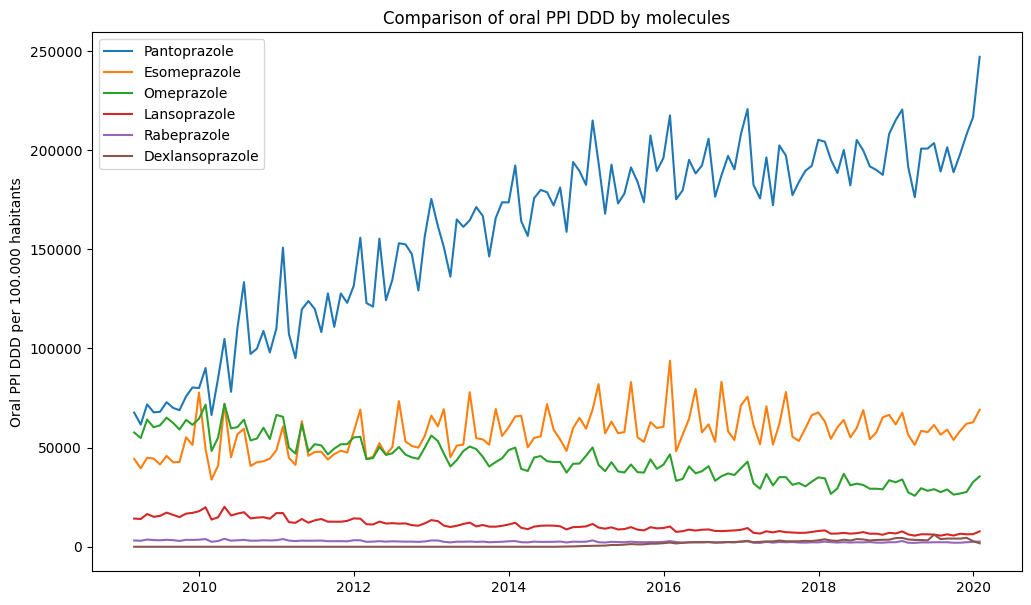

In [ ]:
# Comparison by molecules
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(df['Date'].values, df['Y_PANTOPRAZOLE'].values, label='Pantoprazole')
plt.plot(df['Date'].values, df['Y_ESOMEPRAZOLE'].values, label='Esomeprazole')
plt.plot(df['Date'].values, df['Y_OMEPRAZOLE'].values, label='Omeprazole')
plt.plot(df['Date'].values, df['Y_LANSOPRAZOLE'].values, label='Lansoprazole')
plt.plot(df['Date'].values, df['Y_RABEPRAZOLE'].values, label='Rabeprazole')
plt.plot(df['Date'].values, df['Y_DEXLANSOPRAZOLE'].values, label='Dexlansoprazole')

plt.title('Comparison of oral PPI DDD by molecules')
plt.ylabel('Oral PPI DDD per 100.000 habitants')

plt.legend()

plt.show()

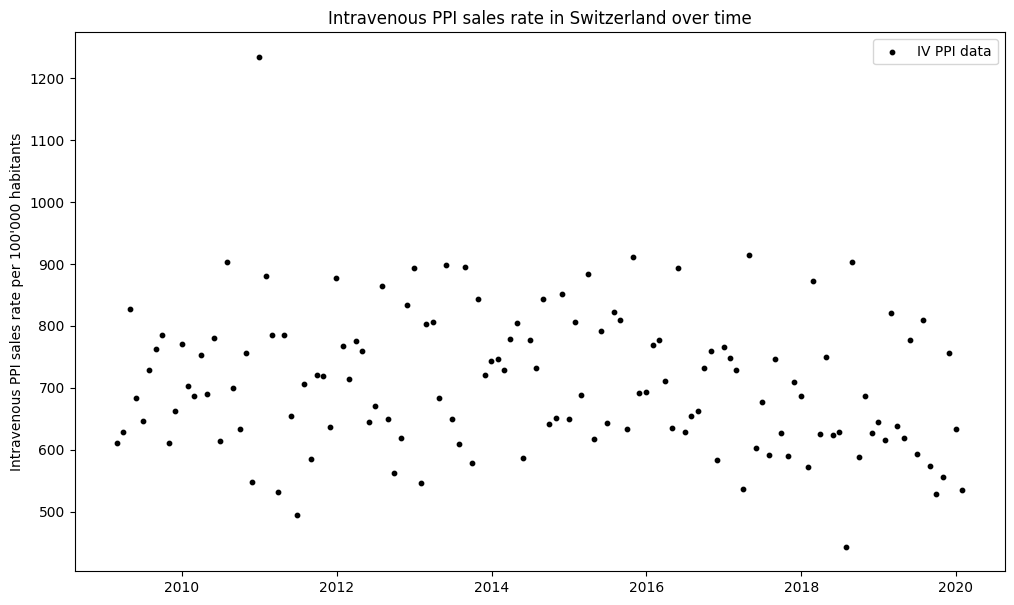

In [ ]:
# Intravenous PPI sales
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,7))

# Plot bounce rate data
ax.scatter(df['Date'], df['Y_PPI_IV'], facecolors='k', edgecolors='k', label='IV PPI data', linewidths=1,s=10)

plt.title('Intravenous PPI sales rate in Switzerland over time')
plt.ylabel("Intravenous PPI sales rate per 100'000 habitants");

plt.legend()

plt.show()

## Data Analysis

In [ ]:
# convert the Purchase Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
# add a column for Year
df['Year'] = df['Date'].dt.year
# print the dataframe
df

,Y,Y_DEXLANSOPRAZOLE,Y_ESOMEPRAZOLE,Y_LANSOPRAZOLE,Y_OMEPRAZOLE,Y_PANTOPRAZOLE,Y_RABEPRAZOLE,Y_PPI_IV,T,D,P,Date,Year
0,187028,0,44319,14214,57633,67688,3175,610,1,0,0,2009-02-28,2009
1,173150,0,39586,14013,54877,61627,3047,628,2,0,0,2009-03-31,2009
2,201020,0,44871,16507,64161,71833,3648,828,3,0,0,2009-04-30,2009
3,191096,0,44493,15118,60282,67798,3405,684,4,0,0,2009-05-31,2009
4,189767,0,41523,15585,61281,68091,3287,647,5,0,0,2009-06-30,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,280980,4155,53909,5678,26300,188900,2038,528,128,1,63,2019-09-30,2019
128,296150,4120,58444,6572,26884,198080,2050,555,129,1,64,2019-10-31,2019
129,310643,4515,62027,6305,27614,207885,2297,756,130,1,65,2019-11-30,2019
130,323805,2851,62775,6353,32644,216673,2510,633,131,1,66,2019-12-31,2019


### Adfuller Test for Stationarity

This test is used to decide whether the data are stationary or not.
- If the data are stationary, we set d = 0.
- If the data are not stationary, we need to analyze the model in greater depth.

In [ ]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", round(dftest[1],6))
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
       print("\t",key, ": ", val)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

adf_test(df.Y)

1. ADF :  -2.990745353876851
2. P-Value :  0.035768
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 120
5. Critical Values :
	 1% :  -3.486055829282407
	 5% :  -2.8859430324074076
	 10% :  -2.5797850694444446
Reject Ho - Time Series is Stationary


### Seasonality

Looking at the ACF chart, we can see that the autocorrelation trend is decreasing, with peaks every 6 months.

We'll therefore choose 6 or 12 months as the seasonality.

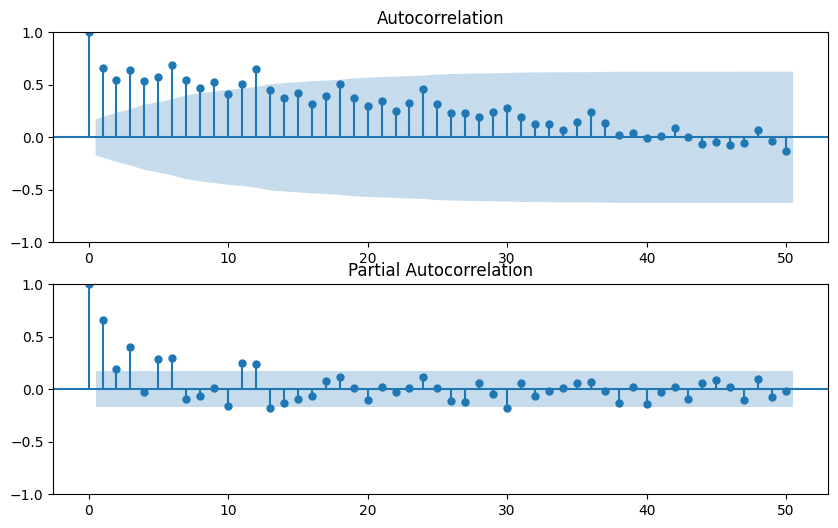

In [ ]:
lag_acf = 50
lag_pacf = 50

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plot_acf(df.Y,lags=lag_acf, ax=ax[0],alpha=.05);
plot_pacf(df.Y,lags=lag_pacf, ax=ax[1],alpha=.05);

We can confirme this hypothesis by de-trending the data

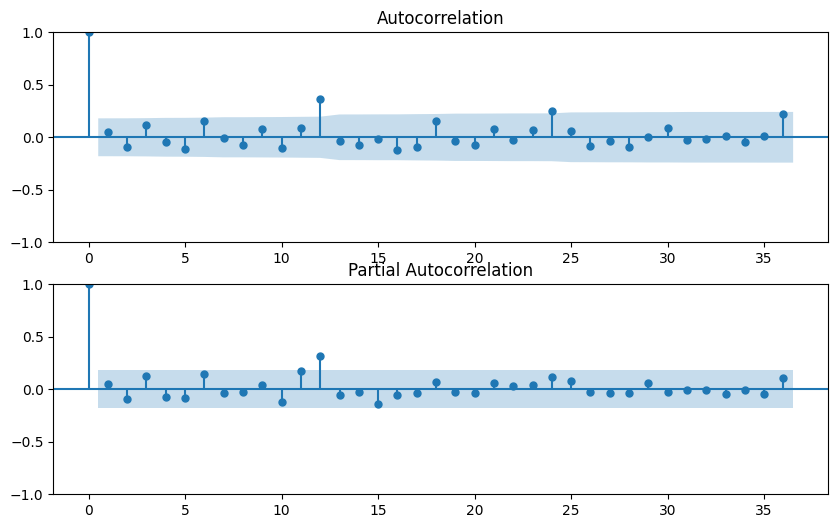

In [ ]:
df = pd.read_csv("PPI_data_final.csv")

df_trend = df - df.rolling(15).mean()

# Drop the NaN values
df_trend = df_trend.dropna()
df_trend[df_trend < 0] = 15000
# Create figure and subplots
lag_acf = 36
lag_pacf = 36

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plot_acf(df_trend.Y,lags=lag_acf, ax=ax[0],alpha=.05);
plot_pacf(df_trend.Y,lags=lag_pacf, ax=ax[1],alpha=.05);

According to the de-trend acf and pacf, we set m=12 for the seasonality.

### Auto ARIMA

It is now possible to use the auto-arima function to define the missing terms (p,q,P,Q,D).

In [ ]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')
# fit stepwise auto-ARIMA
# aic
stepwise_fit_aic = pm.auto_arima(df.Y, start_p=1, start_q=1, max_p=5, max_q=5,d=0,
                             start_P=1, D=None, start_Q=1, max_P=5, max_D=1, max_Q=5, max_order=None, seasonal=True,m=12,
                             maxiter=20, trace=True,alpha=0.05, information_criterion = "aic",
                             return_valid_fits = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True);  # set to stepwise
# bic
stepwise_fit_bic = pm.auto_arima(df.Y, start_p=1, start_q=1, max_p=5, max_q=5,d=0,
                             start_P=1, D=None, start_Q=1, max_P=5, max_D=1, max_Q=5, max_order=None, seasonal=True,m=12,
                             maxiter=20, trace=True,alpha=0.05, information_criterion = "bic",
                             return_valid_fits = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True);  # set to stepwise
# hqic
stepwise_fit_hqic = pm.auto_arima(df.Y, start_p=1, start_q=1, max_p=5, max_q=5,d=0,
                             start_P=1, D=None, start_Q=1, max_P=5, max_D=1, max_Q=5, max_order=None, seasonal=True,m=12,
                             maxiter=20, trace=True,alpha=0.05, information_criterion = "hqic",
                             return_valid_fits = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True);  # set to stepwise
# oob
stepwise_fit_oob = pm.auto_arima(df.Y, start_p=1, start_q=1, max_p=5, max_q=5,d=0,
                             start_P=1, D=None, start_Q=1, max_P=5, max_D=1, max_Q=5, max_order=None, seasonal=True,m=12,
                             maxiter=20, trace=True,alpha=0.05, information_criterion = "oob", out_of_sample_size=12,  # Specify non-zero holdout
                             return_valid_fits = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True);  # set to stepwise

/tmp/ipython-input-4720/2353089924.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3065.738, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3192.602, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3076.022, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3122.694, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3686.562, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3070.608, Time=0.20 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3063.756, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3101.315, Time=0.06 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=3064.266, Time=0.47 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=3059.813, Time=0.75 sec
 ARIMA(1,0,1)(3,0,1)[12] intercept   : AIC=3066.733, Time=1.63 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=3067.856, Time=1.15 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3077.834, Time=2.68 sec
 ARIMA(1,0,1)(3,0,0)[12] intercept   : AIC=3065.679, Time=1.36 sec
 ARIMA(1,0,1)(3,0,2

Create a table with the best parameters

In [ ]:
d = {'aic': stepwise_fit_aic[0:5], 'bic': stepwise_fit_bic[0:5], 'hqic': stepwise_fit_hqic[0:5], 'oob': stepwise_fit_oob[0:5] }
df = pd.DataFrame(data=d)
df

,aic,bic,hqic,oob
0,"ARIMA(5,0,0)(1,0,1)[12]","ARIMA(3,0,0)(1,0,0)[12] intercept","ARIMA(4,0,2)(1,0,1)[12]","ARIMA(0,0,0)(4,0,3)[12] intercept"
1,"ARIMA(5,0,0)(1,0,2)[12]","ARIMA(3,0,0)(2,0,0)[12] intercept","ARIMA(4,0,2)(2,0,1)[12]","ARIMA(1,0,1)(4,0,3)[12] intercept"
2,"ARIMA(5,0,0)(2,0,1)[12]","ARIMA(3,0,0)(2,0,1)[12] intercept","ARIMA(4,0,2)(1,0,2)[12]","ARIMA(1,0,2)(4,0,3)[12] intercept"
3,"ARIMA(5,0,0)(2,0,2)[12]","ARIMA(3,0,1)(2,0,0)[12] intercept","ARIMA(5,0,2)(1,0,1)[12]","ARIMA(2,0,1)(4,0,3)[12] intercept"
4,"ARIMA(5,0,1)(1,0,1)[12]","ARIMA(3,0,1)(1,0,0)[12] intercept","ARIMA(5,0,3)(1,0,1)[12]","ARIMA(0,0,0)(4,0,2)[12] intercept"


Now we can perform ljungbox and normal test for each set of parameters.

In [ ]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')

aic_ljungbox = []
aic_normal = []
bic_ljungbox = []
bic_normal = []
hqic_ljungbox = []
hqic_normal = []
oob_ljungbox = []
oob_normal = []

#aic
for i in range(5):
  mod = stepwise_fit_aic[i]
  p,d,q = mod.get_params(deep=False)["order"]
  P,D,Q,s = mod.get_params(deep=False)['seasonal_order']
  arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
  ljungbox = sm.stats.acorr_ljungbox(arima_results.resid, lags=[24], return_df=True)
  normal = stats.normaltest(arima_results.resid)
  aic_ljungbox.append(ljungbox["lb_pvalue"][24])
  aic_normal.append(normal.pvalue)

#bic
for i in range(5):
  mod = stepwise_fit_bic[i]
  p,d,q = mod.get_params(deep=False)["order"]
  P,D,Q,s = mod.get_params(deep=False)['seasonal_order']
  arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
  ljungbox = sm.stats.acorr_ljungbox(arima_results.resid, lags=[24], return_df=True)
  normal = stats.normaltest(arima_results.resid)
  bic_ljungbox.append(ljungbox["lb_pvalue"][24])
  bic_normal.append(normal.pvalue)

#hqic
for i in range(5):
  mod = stepwise_fit_hqic[i]
  p,d,q = mod.get_params(deep=False)["order"]
  P,D,Q,s = mod.get_params(deep=False)['seasonal_order']
  arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
  ljungbox = sm.stats.acorr_ljungbox(arima_results.resid, lags=[24], return_df=True)
  normal = stats.normaltest(arima_results.resid)
  hqic_ljungbox.append(ljungbox["lb_pvalue"][24])
  hqic_normal.append(normal.pvalue)

#oob
for i in range(5):
  mod = stepwise_fit_oob[i]
  p,d,q = mod.get_params(deep=False)["order"]
  P,D,Q,s = mod.get_params(deep=False)['seasonal_order']
  arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
  ljungbox = sm.stats.acorr_ljungbox(arima_results.resid, lags=[24], return_df=True)
  normal = stats.normaltest(arima_results.resid)
  oob_ljungbox.append(ljungbox["lb_pvalue"][24])
  oob_normal.append(normal.pvalue)

/tmp/ipython-input-4720/1668119260.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

In [ ]:
d = {'aic_ljungbox': aic_ljungbox, 'aic_normal': aic_normal, 'bic_ljungbox': bic_ljungbox, 'bic_normal': bic_normal,
     'hqic_ljungbox': hqic_ljungbox, 'hqic_normal': hqic_normal, 'oob_ljungbox': oob_ljungbox, 'oob_normal': oob_normal}
df_test = pd.DataFrame(data=d)
df_test

,aic_ljungbox,aic_normal,bic_ljungbox,bic_normal,hqic_ljungbox,hqic_normal,oob_ljungbox,oob_normal
0,0.482226,0.009711,0.136765,0.175223,0.819447,0.005104,0.015286,0.000518
1,0.419233,0.007266,0.258329,0.051005,0.854085,0.004418,0.056134,0.000136
2,0.423512,0.007619,0.353009,0.008765,0.868697,0.003545,0.230582,0.002156
3,0.484445,0.008049,0.311978,0.046482,0.807568,0.015494,0.384180,0.003992
4,0.490298,0.021860,0.144414,0.187815,0.766407,0.001513,0.027594,0.001043


From the table, we can deduce that the best parameters are the 1st from the bic measure (the ones on the list to accept $H_0$ for both the residuals and the normality).

In [ ]:
stepwise_fit_bic[0]

ARIMA(maxiter=20, order=(3, 0, 0), scoring_args={},
      seasonal_order=(1, 0, 0, 12), suppress_warnings=True)

### Test

In [ ]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='ME')
p = 3
d = 0
q = 0
P = 1
D = 0
Q = 0
s = 12
arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
print(arima_results.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                Y   No. Observations:                  132
Model:             ARIMA(3, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1496.170
Date:                          Sat, 28 Feb 2026   AIC                           3010.341
Time:                                  11:20:20   BIC                           3036.286
Sample:                                       0   HQIC                          3020.884
                                          - 132                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.935e+05   1.05e+04     18.420      0.000    1.73e+05    2.14e+05
T           1612.6630    251.378      6.415      0.

### Plot

/tmp/ipython-input-4720/3681703757.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')


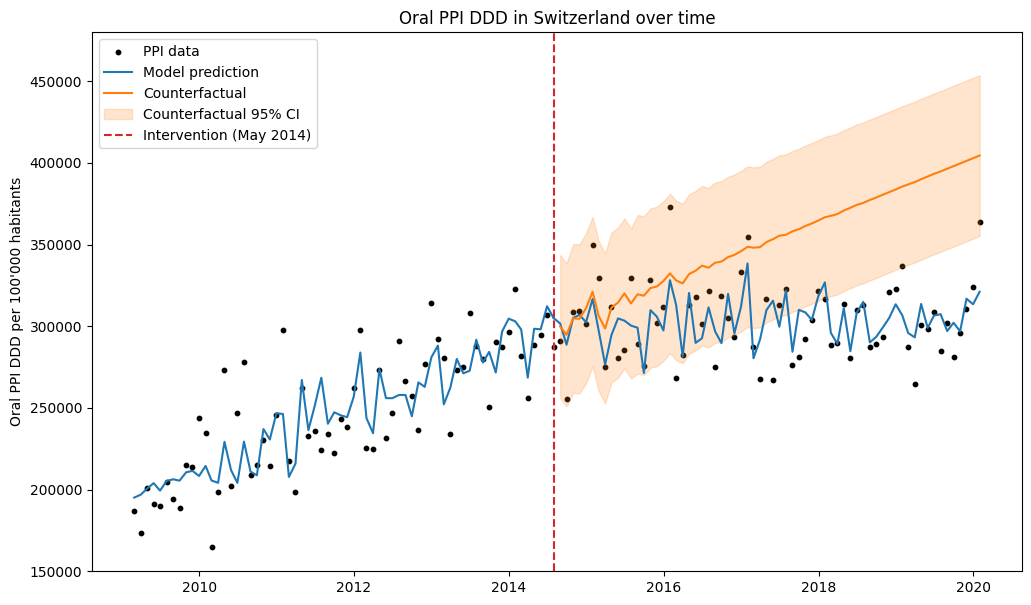

In [68]:
start = 66
end = 132
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='M')
intervention_date = df['Date'][start-1]

predictions = arima_results.get_prediction(0,end-1)
summary = predictions.summary_frame(alpha=0.05)

arima_cf = ARIMA(df["Y"][0:start], df["T"][0:start], order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()

# Model predictions means
y_pred = predictions.predicted_mean

# Counterfactual mean and 95% confidence interval
y_cf = arima_cf.get_forecast(end-start, exog=df["T"][start:end]).summary_frame(alpha=0.05)

# Plot section
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,7))
ax.set_ylim([150000, 480000])

# Plot bounce rate data
ax.scatter(df["Date"], df["Y"], facecolors='k', edgecolors='k', label="PPI data", linewidths=1,s=10)

# Plot model mean bounce prediction
ax.plot(df["Date"][:start], y_pred[0:start], 'C0-', label="Model prediction")
ax.plot(df["Date"][start-1:end], y_pred[start-1:], 'C0-')

# Plot counterfactual mean bounce rate with 95% confidence interval
ax.plot(df["Date"][start:], y_cf["mean"], 'C1-', label="Counterfactual")
ax.fill_between(df["Date"][start:], y_cf['mean_ci_lower'], y_cf['mean_ci_upper'], color='C1', alpha=0.2, label="Counterfactual 95% CI");


# Plot line marking intervention moment
ax.axvline(x = intervention_date, color = 'C3', linestyle='--', label = 'Intervention (May 2014)')
ax.legend(loc='upper left')
plt.title('Oral PPI DDD in Switzerland over time')
#plt.xlabel("Date")
plt.ylabel("Oral PPI DDD per 100'000 habitants");

It is possible to check the quality of the parameters set for the model.

Ljung-Box test to check if autocorrelation exists in a time series:
- H0: The residuals are independently distributed.

- H1: The residuals are not independently distributed; they exhibit serial correlation.

In [70]:
sm.stats.acorr_ljungbox(arima_results.resid, lags=[24], return_df=True)

,lb_stat,lb_pvalue
24,31.617471,0.136765


Here lb_value > 0.05 so we can conclude that the residuals are independently distributed.

And we can check if the residuals are normally distributed.

In [71]:
from scipy import stats
stats.normaltest(arima_results.resid)

NormaltestResult(statistic=3.483386798019083, pvalue=0.175223426063612)

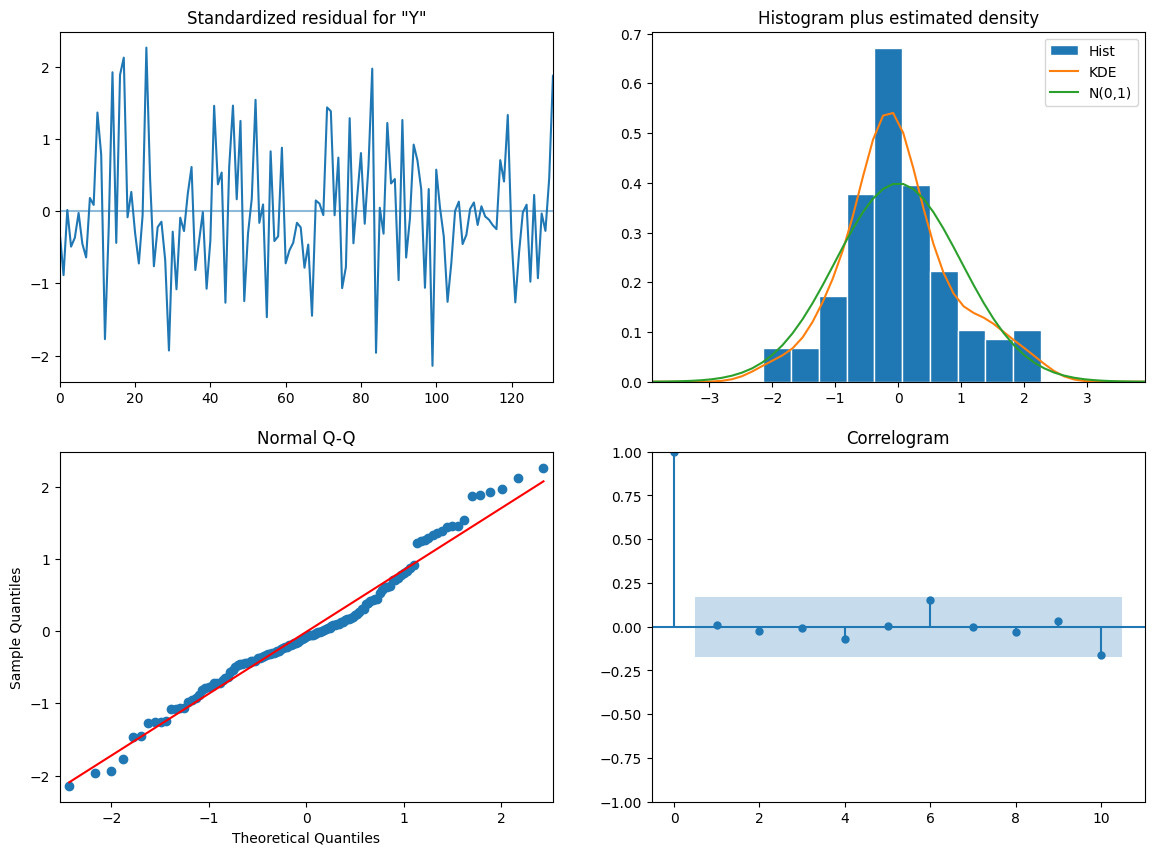

In [72]:
arima_results.plot_diagnostics(figsize=(14,10));

Here's what we can deduce:
- No correlation in residuals (top-left plot)
- The residuals follows a normal distribution (top-right and bottom-left plot)
- Low correlations in residuals (bottom-right plot)

## Rbeast

In [73]:
pip install Rbeast

In [74]:
!python -m pip uninstall -y numpy
!python -m pip install --no-cache-dir --force-reinstall "numpy==1.26.4"
!python -c "import numpy as np; print(np.__version__)"


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 76.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.38.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 whi

In [75]:
import Rbeast as rb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### BMA Analysis for PPI pills


In [76]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='ME')
df

,Y,Y_DEXLANSOPRAZOLE,Y_ESOMEPRAZOLE,Y_LANSOPRAZOLE,Y_OMEPRAZOLE,Y_PANTOPRAZOLE,Y_RABEPRAZOLE,Y_PPI_IV,T,D,P,Date
0,187028,0,44319,14214,57633,67688,3175,610,1,0,0,2009-02-28
1,173150,0,39586,14013,54877,61627,3047,628,2,0,0,2009-03-31
2,201020,0,44871,16507,64161,71833,3648,828,3,0,0,2009-04-30
3,191096,0,44493,15118,60282,67798,3405,684,4,0,0,2009-05-31
4,189767,0,41523,15585,61281,68091,3287,647,5,0,0,2009-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...
127,280980,4155,53909,5678,26300,188900,2038,528,128,1,63,2019-09-30
128,296150,4120,58444,6572,26884,198080,2050,555,129,1,64,2019-10-31
129,310643,4515,62027,6305,27614,207885,2297,756,130,1,65,2019-11-30
130,323805,2851,62775,6353,32644,216673,2510,633,131,1,66,2019-12-31


In [77]:
data, date = df.Y, df.Date
start_month=2009+1/12
o = rb.beast(data, start=start_month, deltat=1/12, period = 1.0)


Model fitted:  Y =  trend + season + error 

INFO: To supress messages, set print_param/print_warning/print_progresss = 0 in beast() and beast_irreg()
INFO: To supress messages, Set extra.printParameter/printWarning/printProgress = 0 in beast123()
INFO: To supress all messaages, set quiet=1 in beast() and beast_irreg() or extra.quiet=1 in beast123()

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 132
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0833333 (unknown unit)
HasSeasonCmpnt: True  | period = 1 (unknown unit). The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0833333 = 12
HasOutlierCmpt: False | If true, Y=Trend+Season+Outlier+Error fitted instead of Y=Trend+Season+Error
Deseasonalize : False | If true, remove a global seaso

TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

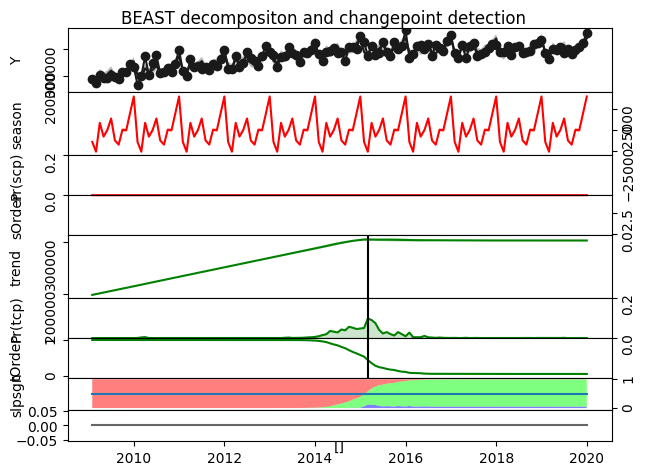

In [78]:
# Plot section
rb.plot(o);

In [79]:
rb.print(o)

#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.999|*********************************************** |
|Pr(ncp = 1 )=0.001|*                                               |
|Pr(ncp = 2 )=0.000|*                                               |
|Pr(ncp = 3 )=0.000|*                                               |
|Pr(ncp = 4 )=0.000|*                                               |
|Pr(ncp = 5 )=0.000|*                                               |
|Pr(ncp = 6 )=0.000|*                                               |
|Pr(ncp = 7 )=0.000|*                                               |
|Pr(ncp = 8 )=0.000|

In [80]:
print(dir(o.trend.cpOccPr))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__buffer__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', 

         cp_time  cp_occ_pr       Date
0    2009.083374   0.000000 2009-02-28
1    2009.166748   0.000000 2009-03-31
2    2009.250000   0.000000 2009-04-30
3    2009.333374   0.000000 2009-05-31
4    2009.416748   0.000000 2009-06-30
..           ...        ...        ...
123  2019.332764   0.000625 2019-05-31
124  2019.416138   0.000500 2019-06-30
125  2019.499390   0.001292 2019-07-31
126  2019.582764   0.000000 2019-08-31
127  2019.666138   0.000000 2019-09-30

[128 rows x 3 columns]
Sum of changepoint probabilities over the interval: 0.88883334
We have a 88.88333439826965 % chance that the change occurred between May-2014 and May-2016


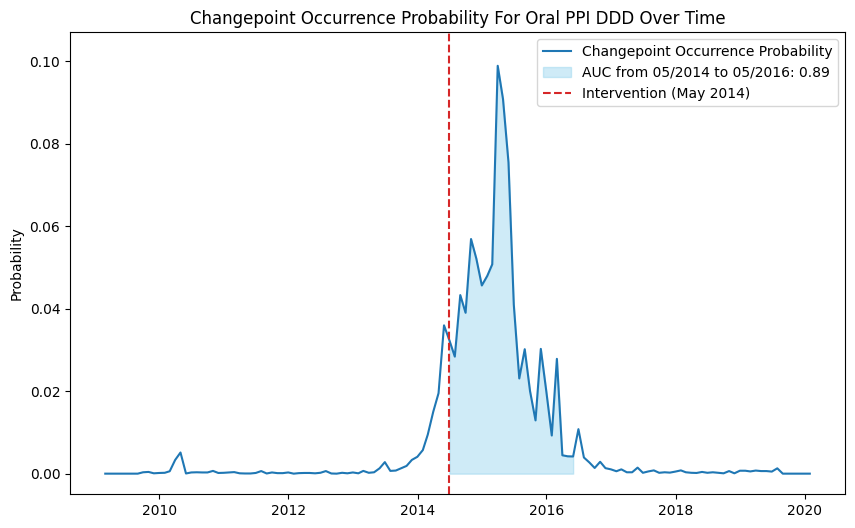

In [81]:
# Assuming o.time is the time array that aligns with cpOccPr
cp_time = o.time
cp_occ_pr = o.trend.cpOccPr
df = pd.DataFrame({
    'cp_time': cp_time,
    'cp_occ_pr': cp_occ_pr,
    'Date': pd.date_range(start='2009-02-01', periods=len(cp_time), freq='ME')
})
print(df.head(128))

# Define the interval start and end
interval_start = 2014+4/12
interval_end = 2016+4/12
intervention_date = df['Date'][64]

# Filter the DataFrame for the desired interval
filtered_df = df[(df['cp_time'] >= interval_start) & (df['cp_time'] < interval_end)]

# Sum the probabilities for the filtered interval
sum_probs = filtered_df['cp_occ_pr'].sum()
print("Sum of changepoint probabilities over the interval:", sum_probs)
print("We have a", sum_probs * 100, "% chance that the change occurred between May-2014 and May-2016")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['cp_occ_pr'], label='Changepoint Occurrence Probability')
plt.fill_between(filtered_df['Date'], filtered_df['cp_occ_pr'], color='skyblue', alpha=0.4, label=f'AUC from 05/2014 to 05/2016: {sum_probs:.2f}')
plt.ylabel('Probability')
plt.title('Changepoint Occurrence Probability For Oral PPI DDD Over Time')
plt.axvline(x=intervention_date, color='C3', linestyle='--', label='Intervention (May 2014)')
plt.legend()
plt.ylim(-0.005, 0.107)
plt.show()


In [82]:
# Define the interval start and end
interval_start = 2014+4/12
interval_end = 2016+4/12
# o.time is a NumPy array with time points
# o.trend.cpOccPr is a NumPy array with corresponding probabilities

# Find indices where time falls within the interval
interval_indices = np.where((o.time >= interval_start) & (o.time < interval_end))

# Extract the probabilities for these indices
interval_probs = o.trend.cpOccPr[interval_indices]

# Sum the probabilities
sum_probs = np.sum(interval_probs)

print("Sum of changepoint probabilities over the interval:", sum_probs)
print("We have a", sum_probs*100, "% chance that the change occured between May-2014 and May-2016")

Sum of changepoint probabilities over the interval: 0.88883334
We have a 88.88333439826965 % chance that the change occured between May-2014 and May-2016


### BMA Analysis for PPI Infusion bottles

In [83]:
df = pd.read_csv("PPI_data_final.csv")
df['Date'] = pd.date_range(start='2009-02-01', periods=len(df), freq='ME')

In [84]:
data, date = df.Y_PPI_IV, df.Date
start_month = 2009+1/12
o = rb.beast(data, start=start_month, deltat=1/12, period = 1.0)


Model fitted:  Y =  trend + season + error 

INFO: To supress messages, set print_param/print_warning/print_progresss = 0 in beast() and beast_irreg()
INFO: To supress messages, Set extra.printParameter/printWarning/printProgress = 0 in beast123()
INFO: To supress all messaages, set quiet=1 in beast() and beast_irreg() or extra.quiet=1 in beast123()

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 132
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0833333 (unknown unit)
HasSeasonCmpnt: True  | period = 1 (unknown unit). The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0833333 = 12
HasOutlierCmpt: False | If true, Y=Trend+Season+Outlier+Error fitted instead of Y=Trend+Season+Error
Deseasonalize : False | If true, remove a global seaso

TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

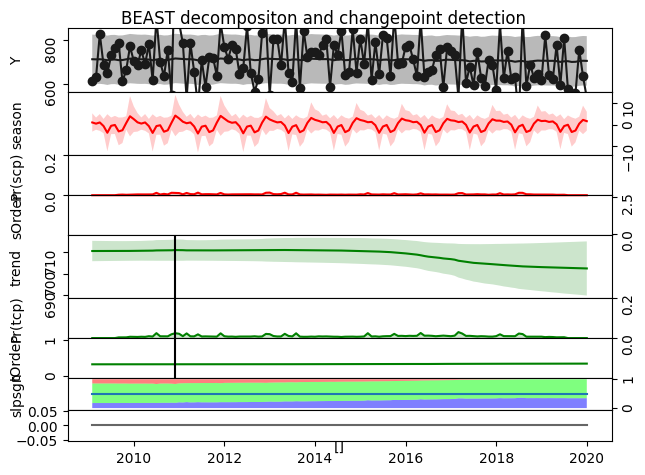

In [85]:
# Plot section
rb.plot(o);

In [86]:
rb.print(o)

#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.600|*********************************************** |
|Pr(ncp = 1 )=0.284|***********************                         |
|Pr(ncp = 2 )=0.072|******                                          |
|Pr(ncp = 3 )=0.028|***                                             |
|Pr(ncp = 4 )=0.010|*                                               |
|Pr(ncp = 5 )=0.004|*                                               |
|Pr(ncp = 6 )=0.001|*                                               |
|Pr(ncp = 7 )=0.001|*                                               |
|Pr(ncp = 8 )=0.000|

In [87]:
print(dir(o.trend.cpOccPr))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__buffer__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', 

         cp_time  cp_occ_pr       Date
0    2009.083374   0.000000 2009-02-28
1    2009.166748   0.000000 2009-03-31
2    2009.250000   0.000000 2009-04-30
3    2009.333374   0.000000 2009-05-31
4    2009.416748   0.000000 2009-06-30
..           ...        ...        ...
123  2019.332764   0.003792 2019-05-31
124  2019.416138   0.004125 2019-06-30
125  2019.499390   0.004292 2019-07-31
126  2019.582764   0.000000 2019-08-31
127  2019.666138   0.000000 2019-09-30

[128 rows x 3 columns]
Sum of changepoint probabilities over the interval: 0.252
We have a 25.200000405311584 % chance that the change occurred between May-2014 and May-2016


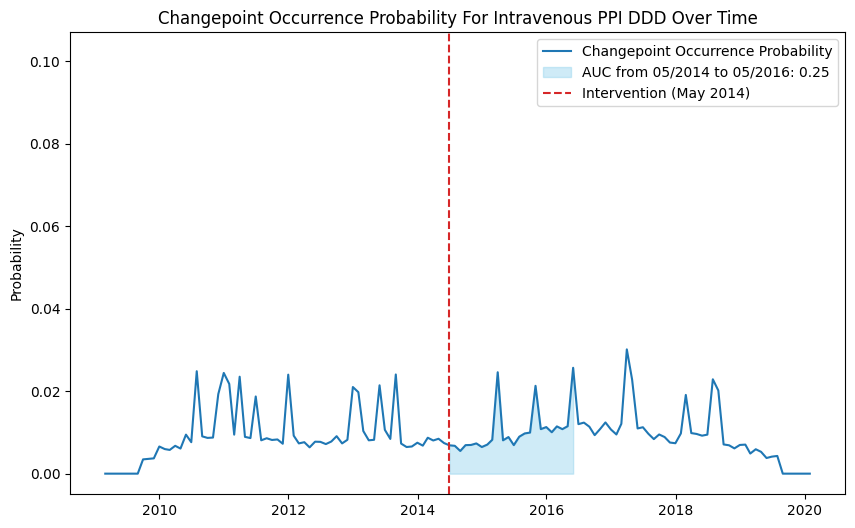

In [88]:

# Assuming o.time is the time array that aligns with cpOccPr
cp_time = o.time
cp_occ_pr = o.trend.cpOccPr
df = pd.DataFrame({
    'cp_time': cp_time,
    'cp_occ_pr': cp_occ_pr,
    'Date': pd.date_range(start='2009-02-01', periods=len(cp_time), freq='ME')
})
print(df.head(128))

# Define the interval start and end
interval_start = 2014+4/12
interval_end = 2016+4/12
intervention_date = df['Date'][64]

# Filter the DataFrame for the desired interval
filtered_df = df[(df['cp_time'] >= interval_start) & (df['cp_time'] < interval_end)]

# Sum the probabilities for the filtered interval
sum_probs = filtered_df['cp_occ_pr'].sum()
print("Sum of changepoint probabilities over the interval:", sum_probs)
print("We have a", sum_probs * 100, "% chance that the change occurred between May-2014 and May-2016")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['cp_occ_pr'], label='Changepoint Occurrence Probability')
plt.fill_between(filtered_df['Date'], filtered_df['cp_occ_pr'], color='skyblue', alpha=0.4, label=f'AUC from 05/2014 to 05/2016: {sum_probs:.2f}')
plt.ylabel('Probability')
plt.title('Changepoint Occurrence Probability For Intravenous PPI DDD Over Time')
plt.axvline(x=intervention_date, color='C3', linestyle='--', label='Intervention (May 2014)')
plt.legend()
plt.ylim(-0.005, 0.107)
plt.show()

In [89]:
# Define the interval start and end
interval_start = 2014+4/12
interval_end = 2016+4/12


# o.time is a NumPy array with time points
# o.trend.cpOccPr is a NumPy array with corresponding probabilities

# Find indices where time falls within the interval
interval_indices = np.where((o.time >= interval_start) & (o.time < interval_end))

# Extract the probabilities for these indices
interval_probs = o.trend.cpOccPr[interval_indices]

# Sum the probabilities
sum_probs = np.sum(interval_probs)

print("Sum of changepoint probabilities over the interval:", sum_probs)
print("We have a", sum_probs*100, "% chance that the change occured between May-2014 and May-2016")

Sum of changepoint probabilities over the interval: 0.252
We have a 25.200000405311584 % chance that the change occured between May-2014 and May-2016
